In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd

In [2]:
news = pd.read_csv('ir.csv')
news.drop('Unnamed: 0', axis=1, inplace=True)
news["publish_date"] = pd.to_datetime(news["publish_date"], format='%Y%m%d')
news

,publish_date,headline_category,headline_text
0,1996-01-02,news,UUP sees possibility of voting Major out
1,1996-01-02,news,Pubs targeted as curbs on smoking are extended
2,1996-01-02,news,Papers reveal secret links with O'Neill cabinet
3,1996-01-02,news,Domestic chaos as Italy takes EU presidency
4,1996-01-02,news,Learning about the star to which we owe life
...,...,...,...
580237,2021-06-05,news,Minister for Health Stephen Donnelly gets firs...
580238,2021-06-05,news,British finance minister - G7 tax agreement pr...
580239,2021-06-06,news,Activists protest return of cruise ships to Ve...
580240,2021-06-14,news,Arlene Foster stands down with emotional speec...


In [3]:
n = news[news.publish_date > '2012-06-16']
n

,publish_date,headline_category,headline_text
558088,2012-06-17,news,Pro-bailout parties in Greece to attempt to fo...
558089,2012-06-17,news,Full text: Pope's address to Congress
558090,2012-06-17,news,Rodney King found dead near LA
558091,2012-06-17,news,Burton plays down sick pay rift
558092,2012-06-17,news,Dublin prepares for Suu Kyi visit
...,...,...,...
580237,2021-06-05,news,Minister for Health Stephen Donnelly gets firs...
580238,2021-06-05,news,British finance minister - G7 tax agreement pr...
580239,2021-06-06,news,Activists protest return of cruise ships to Ve...
580240,2021-06-14,news,Arlene Foster stands down with emotional speec...


In [4]:
n.isna().sum()

publish_date         0
headline_category    0
headline_text        0
dtype: int64

In [5]:
n.dropna(inplace=True)

<ipython-input-5-48bfb7055852>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n.dropna(inplace=True)


In [6]:
print('Unique Headlines Categories: {}'.format(len(n.headline_category.unique())))

Unique Headlines Categories: 1


In [7]:
set([category for category in n.headline_category if "." not in category] ) 

{'news'}

In [8]:
n.drop(columns=['headline_category'], inplace=True)

C:\Users\amora\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [9]:
## Change all the text to lower case
n.headline_text = [entry.lower() for entry in n.headline_text]

C:\Users\amora\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [10]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    n['headline_text'] = n['headline_text'].str.replace(char, ' ')

<ipython-input-10-dda2bc68c49f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n['headline_text'] = n['headline_text'].str.replace(char, ' ')
<ipython-input-10-dda2bc68c49f>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  n['headline_text'] = n['headline_text'].str.replace(char, ' ')


In [11]:
from string import punctuation
 
def punctuation_count(string):
    return len([ele for ele in string if ele in punctuation])
punctuation_count(n.headline_text)

0

In [12]:
n.head(-10)

,publish_date,headline_text
558088,2012-06-17,pro bailout parties in greece to attempt to fo...
558089,2012-06-17,full text pope s address to congress
558090,2012-06-17,rodney king found dead near la
558091,2012-06-17,burton plays down sick pay rift
558092,2012-06-17,dublin prepares for suu kyi visit
...,...,...
580227,2021-04-26,helicopters bring killarney park fire under co...
580228,2021-04-30,dozens killed in stampede at religious festiva...
580229,2021-05-04,safety and good vibes the priorities of ped...
580230,2021-05-04,indians in new delhi queue for vaccinations as...


In [13]:
!pip3 install langdetect tqdm --quiet

In [14]:
from langdetect import detect
from tqdm.notebook import tqdm

tqdm.pandas()

In [15]:
n['lang'] = n.headline_text.progress_map(detect)

  0%|          | 0/22154 [00:00<?, ?it/s]

<ipython-input-15-7fb57cfb4e62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n['lang'] = n.headline_text.progress_map(detect)


In [16]:
n.lang.value_counts()

en    19506
fr      473
da      362
af      258
it      254
ca      232
nl      220
no      197
es      117
sv       92
ro       65
et       59
tl       46
cy       44
id       44
fi       38
de       35
pt       23
so       20
hr       13
sq       11
sl        9
tr        7
hu        5
lv        5
sk        5
lt        5
pl        4
cs        3
sw        2
Name: lang, dtype: int64

In [17]:
n = n.loc[n.lang=='en']

In [18]:
n.lang.value_counts()

en    19506
Name: lang, dtype: int64

In [19]:
from nltk.tokenize import sent_tokenize

In [21]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amora\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
n.head()

,publish_date,headline_text,lang
558088,2012-06-17,pro bailout parties in greece to attempt to fo...,en
558089,2012-06-17,full text pope s address to congress,en
558090,2012-06-17,rodney king found dead near la,en
558091,2012-06-17,burton plays down sick pay rift,en
558093,2012-06-17,brady defends hosting of congress,en


In [23]:
n['sentences'] = n.headline_text.progress_map(sent_tokenize)
n['sentences'].head().tolist() # Print the first 3 sentences of the 1st article

  0%|          | 0/19506 [00:00<?, ?it/s]

<ipython-input-23-24627a753cd4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n['sentences'] = n.headline_text.progress_map(sent_tokenize)


[['pro bailout parties in greece to attempt to form coalition'],
 ['full text  pope s address to congress'],
 ['rodney king found dead near la'],
 ['burton plays down sick pay rift'],
 ['brady defends hosting of congress']]

In [24]:
from nltk.tokenize import word_tokenize

In [25]:
n['tokens_sentences'] = n['sentences'].progress_map(lambda sentences: [word_tokenize(sentence) for sentence in sentences])
print(n['tokens_sentences'].head().tolist())

  0%|          | 0/19506 [00:00<?, ?it/s]

[[['pro', 'bailout', 'parties', 'in', 'greece', 'to', 'attempt', 'to', 'form', 'coalition']], [['full', 'text', 'pope', 's', 'address', 'to', 'congress']], [['rodney', 'king', 'found', 'dead', 'near', 'la']], [['burton', 'plays', 'down', 'sick', 'pay', 'rift']], [['brady', 'defends', 'hosting', 'of', 'congress']]]


<ipython-input-25-8a0d16b9ff33>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n['tokens_sentences'] = n['sentences'].progress_map(lambda sentences: [word_tokenize(sentence) for sentence in sentences])


In [26]:
from nltk import pos_tag

In [27]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\amora\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [28]:
n['POS_tokens'] = n['tokens_sentences'].progress_map(lambda tokens_sentences: [pos_tag(tokens) for tokens in tokens_sentences])
print(n['POS_tokens'].head(1).tolist())

  0%|          | 0/19506 [00:00<?, ?it/s]

[[[('pro', 'FW'), ('bailout', 'NN'), ('parties', 'NNS'), ('in', 'IN'), ('greece', 'NN'), ('to', 'TO'), ('attempt', 'VB'), ('to', 'TO'), ('form', 'VB'), ('coalition', 'NN')]]]


<ipython-input-28-ce63617ee6a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n['POS_tokens'] = n['tokens_sentences'].progress_map(lambda tokens_sentences: [pos_tag(tokens) for tokens in tokens_sentences])


In [29]:
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [30]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amora\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [31]:
n['tokens_sentences_lemmatized'] = n['POS_tokens'].progress_map(
    lambda list_tokens_POS: [
        [
            lemmatizer.lemmatize(el[0], get_wordnet_pos(el[1])) 
            if get_wordnet_pos(el[1]) != '' else el[0] for el in tokens_POS
        ] 
        for tokens_POS in list_tokens_POS
    ]
)

  0%|          | 0/19506 [00:00<?, ?it/s]

<ipython-input-31-8d20d9f0a3bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n['tokens_sentences_lemmatized'] = n['POS_tokens'].progress_map(


In [32]:
n.tokens_sentences_lemmatized.head(20)

558088    [[pro, bailout, party, in, greece, to, attempt...
558089       [[full, text, pope, s, address, to, congress]]
558090               [[rodney, king, find, dead, near, la]]
558091              [[burton, play, down, sick, pay, rift]]
558093             [[brady, defend, hosting, of, congress]]
558094                   [[ambulance, attack, in, belfast]]
558095             [[fresh, shelling, in, syria, kill, 11]]
558097            [[hollande, s, party, secures, majority]]
558098              [[fire, in, turkish, prison, kill, 13]]
558099               [[second, day, of, voting, in, egypt]]
558100              [[abuse, in, church, a, mystery, pope]]
558101                 [[man, die, before, radiohead, gig]]
558104        [[nalbandian, kick, out, and, be, kick, out]]
558105         [[personal, insolvency, bill, on, the, way]]
558106                [[mladic, trial, suspend, by, court]]
558107                  [[kindness, author, shot, himself]]
558108                 [[reality, star, 

In [33]:
n['tokens_sentences_lemmatized'].head(1).tolist()[0][:3]

[['pro',
  'bailout',
  'party',
  'in',
  'greece',
  'to',
  'attempt',
  'to',
  'form',
  'coalition']]

In [34]:
n.head()

,publish_date,headline_text,lang,sentences,tokens_sentences,POS_tokens,tokens_sentences_lemmatized
558088,2012-06-17,pro bailout parties in greece to attempt to fo...,en,[pro bailout parties in greece to attempt to f...,"[[pro, bailout, parties, in, greece, to, attem...","[[(pro, FW), (bailout, NN), (parties, NNS), (i...","[[pro, bailout, party, in, greece, to, attempt..."
558089,2012-06-17,full text pope s address to congress,en,[full text pope s address to congress],"[[full, text, pope, s, address, to, congress]]","[[(full, JJ), (text, NN), (pope, NN), (s, NN),...","[[full, text, pope, s, address, to, congress]]"
558090,2012-06-17,rodney king found dead near la,en,[rodney king found dead near la],"[[rodney, king, found, dead, near, la]]","[[(rodney, NN), (king, VBG), (found, VBN), (de...","[[rodney, king, find, dead, near, la]]"
558091,2012-06-17,burton plays down sick pay rift,en,[burton plays down sick pay rift],"[[burton, plays, down, sick, pay, rift]]","[[(burton, NN), (plays, VBZ), (down, RP), (sic...","[[burton, play, down, sick, pay, rift]]"
558093,2012-06-17,brady defends hosting of congress,en,[brady defends hosting of congress],"[[brady, defends, hosting, of, congress]]","[[(brady, JJ), (defends, VBZ), (hosting, NN), ...","[[brady, defend, hosting, of, congress]]"


In [35]:
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amora\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
stopwords_verbs = ['say', 'get', 'go', 'know', 'may', 'need', 'like', 'make', 'see', 'want', 'come', 'take', 'use', 'would', 'can']
stopwords_other = ['one', 'mr', 'bbc', 'image', 'getty', 'de', 'en', 'caption', 'also', 'copyright', 'something', 'in', 'to', 'of', 's', 'likely', 'food', 'play', 'couple', 'medium', 'far', 'back', 'us', 'open', 'stop', 'without', 'outside', 'near', 'name', 'miss', 'put', 'day', 'number', 'four', 'find', 'give', 'ahead', 'boy', 'men', 'young', 'keep', 'top', 'big', ]

In [37]:
my_stopwords = stopwords.words('english')
new_stopwords = stopwords_verbs + stopwords_other + my_stopwords
my_stopwords.extend(new_stopwords)

In [38]:
from itertools import chain # to flatten list of sentences of tokens into list of tokens

In [39]:
n['tokens'] = n['tokens_sentences_lemmatized'].map(lambda sentences: list(chain.from_iterable(sentences)))
n['tokens'] = n['tokens'].map(lambda tokens: [token.lower() for token in tokens if token.isalpha() 
                                                    and token.lower() not in my_stopwords and len(token)>1])

<ipython-input-39-761565265f47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n['tokens'] = n['tokens_sentences_lemmatized'].map(lambda sentences: list(chain.from_iterable(sentences)))
<ipython-input-39-761565265f47>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n['tokens'] = n['tokens'].map(lambda tokens: [token.lower() for token in tokens if token.isalpha()


In [40]:
n['tokens'].head(1).tolist()[0][:30]

['pro', 'bailout', 'party', 'greece', 'attempt', 'form', 'coalition']

In [41]:
n.tokens.head(20)

558088    [pro, bailout, party, greece, attempt, form, c...
558089                [full, text, pope, address, congress]
558090                             [rodney, king, dead, la]
558091                            [burton, sick, pay, rift]
558093                   [brady, defend, hosting, congress]
558094                         [ambulance, attack, belfast]
558095                       [fresh, shelling, syria, kill]
558097                 [hollande, party, secures, majority]
558098                        [fire, turkish, prison, kill]
558099                              [second, voting, egypt]
558100                       [abuse, church, mystery, pope]
558101                           [man, die, radiohead, gig]
558104                             [nalbandian, kick, kick]
558105                    [personal, insolvency, bill, way]
558106                      [mladic, trial, suspend, court]
558107                             [kindness, author, shot]
558108                       [reality, s

In [42]:
n.head(10)

,publish_date,headline_text,lang,sentences,tokens_sentences,POS_tokens,tokens_sentences_lemmatized,tokens
558088,2012-06-17,pro bailout parties in greece to attempt to fo...,en,[pro bailout parties in greece to attempt to f...,"[[pro, bailout, parties, in, greece, to, attem...","[[(pro, FW), (bailout, NN), (parties, NNS), (i...","[[pro, bailout, party, in, greece, to, attempt...","[pro, bailout, party, greece, attempt, form, c..."
558089,2012-06-17,full text pope s address to congress,en,[full text pope s address to congress],"[[full, text, pope, s, address, to, congress]]","[[(full, JJ), (text, NN), (pope, NN), (s, NN),...","[[full, text, pope, s, address, to, congress]]","[full, text, pope, address, congress]"
558090,2012-06-17,rodney king found dead near la,en,[rodney king found dead near la],"[[rodney, king, found, dead, near, la]]","[[(rodney, NN), (king, VBG), (found, VBN), (de...","[[rodney, king, find, dead, near, la]]","[rodney, king, dead, la]"
558091,2012-06-17,burton plays down sick pay rift,en,[burton plays down sick pay rift],"[[burton, plays, down, sick, pay, rift]]","[[(burton, NN), (plays, VBZ), (down, RP), (sic...","[[burton, play, down, sick, pay, rift]]","[burton, sick, pay, rift]"
558093,2012-06-17,brady defends hosting of congress,en,[brady defends hosting of congress],"[[brady, defends, hosting, of, congress]]","[[(brady, JJ), (defends, VBZ), (hosting, NN), ...","[[brady, defend, hosting, of, congress]]","[brady, defend, hosting, congress]"
558094,2012-06-17,ambulance attacked in belfast,en,[ambulance attacked in belfast],"[[ambulance, attacked, in, belfast]]","[[(ambulance, NN), (attacked, VBN), (in, IN), ...","[[ambulance, attack, in, belfast]]","[ambulance, attack, belfast]"
558095,2012-06-17,fresh shelling in syria kills 11,en,[fresh shelling in syria kills 11],"[[fresh, shelling, in, syria, kills, 11]]","[[(fresh, JJ), (shelling, NN), (in, IN), (syri...","[[fresh, shelling, in, syria, kill, 11]]","[fresh, shelling, syria, kill]"
558097,2012-06-17,hollande s party secures majority,en,[hollande s party secures majority],"[[hollande, s, party, secures, majority]]","[[(hollande, NN), (s, NN), (party, NN), (secur...","[[hollande, s, party, secures, majority]]","[hollande, party, secures, majority]"
558098,2012-06-17,fire in turkish prison kills 13,en,[fire in turkish prison kills 13],"[[fire, in, turkish, prison, kills, 13]]","[[(fire, NN), (in, IN), (turkish, JJ), (prison...","[[fire, in, turkish, prison, kill, 13]]","[fire, turkish, prison, kill]"
558099,2012-06-17,second day of voting in egypt,en,[second day of voting in egypt],"[[second, day, of, voting, in, egypt]]","[[(second, JJ), (day, NN), (of, IN), (voting, ...","[[second, day, of, voting, in, egypt]]","[second, voting, egypt]"


.

**LDA**

In [45]:
from gensim.models import Phrases
from gensim import corpora
from gensim import models
import numpy as np
from nltk import corpus
#from gensim.models.wrappers import LdaMallet
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.corpora.dictionary import Dictionary
#from keras.models import load_model


In [46]:
tokens = n['tokens'].tolist()
bigram_model = Phrases(tokens)
trigram_model = Phrases(bigram_model[tokens], min_count=1)
tokens = list(trigram_model[bigram_model[tokens]])

In [47]:
dictionary_LDA = corpora.Dictionary(tokens)
dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(token) for token in tokens]

In [48]:
np.random.seed(123456)
num_topics = 6
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  passes=4, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_LDA.keys()))


Wall time: 7.88 s


In [49]:
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=20):
    print(str(i)+": "+ topic)
    print()

0: 0.031*"dublin" + 0.020*"woman" + 0.019*"case" + 0.015*"two" + 0.014*"crash" + 0.013*"award" + 0.013*"attack" + 0.012*"hold" + 0.012*"win" + 0.012*"weekend" + 0.012*"taoiseach" + 0.011*"man" + 0.011*"death" + 0.010*"kill" + 0.010*"visit" + 0.010*"year" + 0.009*"inquiry" + 0.009*"garda" + 0.009*"bring" + 0.009*"appeal"

1: 0.018*"protest" + 0.017*"government" + 0.015*"pay" + 0.014*"cut" + 0.013*"plan" + 0.012*"concern" + 0.010*"abortion" + 0.010*"shatter" + 0.010*"challenge" + 0.010*"talk" + 0.009*"irish" + 0.008*"call" + 0.008*"student" + 0.008*"force" + 0.007*"bill" + 0.007*"property_tax" + 0.007*"new" + 0.007*"ni" + 0.007*"israel" + 0.006*"britain"

2: 0.027*"ireland" + 0.016*"new" + 0.016*"irish" + 0.015*"uk" + 0.013*"kenny" + 0.013*"death" + 0.013*"deal" + 0.012*"tell" + 0.012*"child" + 0.011*"action" + 0.011*"home" + 0.009*"way" + 0.009*"praise" + 0.008*"eu" + 0.008*"must" + 0.008*"system" + 0.008*"part" + 0.008*"coalition" + 0.008*"france" + 0.008*"croke_park"

3: 0.029*"call" 

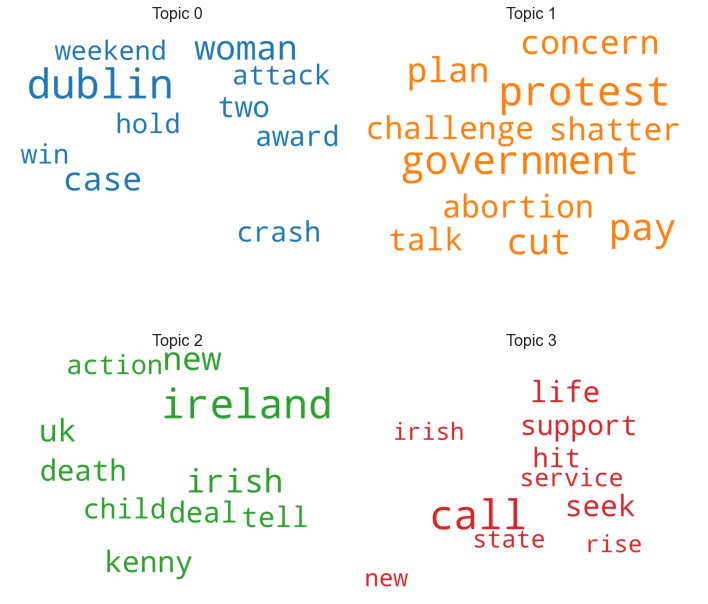

In [63]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=my_stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


In [50]:
n.tokens[0:5000]

558088    [pro, bailout, party, greece, attempt, form, c...
558089                [full, text, pope, address, congress]
558090                             [rodney, king, dead, la]
558091                            [burton, sick, pay, rift]
558093                   [brady, defend, hosting, congress]
                                ...                        
563694             [threat, allegation, mar, election, run]
563695                    [minister, threat, third, runway]
563696             [suicide, bomber, kill, islamic, leader]
563697                           [two, dead, riot, mombasa]
563699                   [murder, inquiry, launch, dundalk]
Name: tokens, Length: 5000, dtype: object

In [51]:
print(n.tokens.iloc[0][:500])

['pro', 'bailout', 'party', 'greece', 'attempt', 'form', 'coalition']


In [52]:
lda_model[corpus[0]]

[(1, 0.35657465), (3, 0.63035005)]

In [53]:
topics = [lda_model[corpus[i]] for i in range(len(n))]

In [54]:
def topics_document_to_dataframe(topics_document, num_topics):
    res = pd.DataFrame(columns=range(num_topics))
    for topic_weight in topics_document:
        res.loc[0, topic_weight[0]] = topic_weight[1]
    return res


In [55]:
document_topic = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics]) \
  .reset_index(drop=True).fillna(0)

In [56]:
document_topic.head()

,0,1,2,3,4,5
0,0.000000,0.356559,0.000000,0.630365,0.0,0.0
1,0.000000,0.000000,0.975726,0.000000,0.0,0.0
2,0.330053,0.000000,0.000000,0.656872,0.0,0.0
3,0.000000,0.952820,0.000000,0.000000,0.0,0.0
4,0.000000,0.000000,0.000000,0.975727,0.0,0.0


 distribution of topics

<AxesSubplot:>

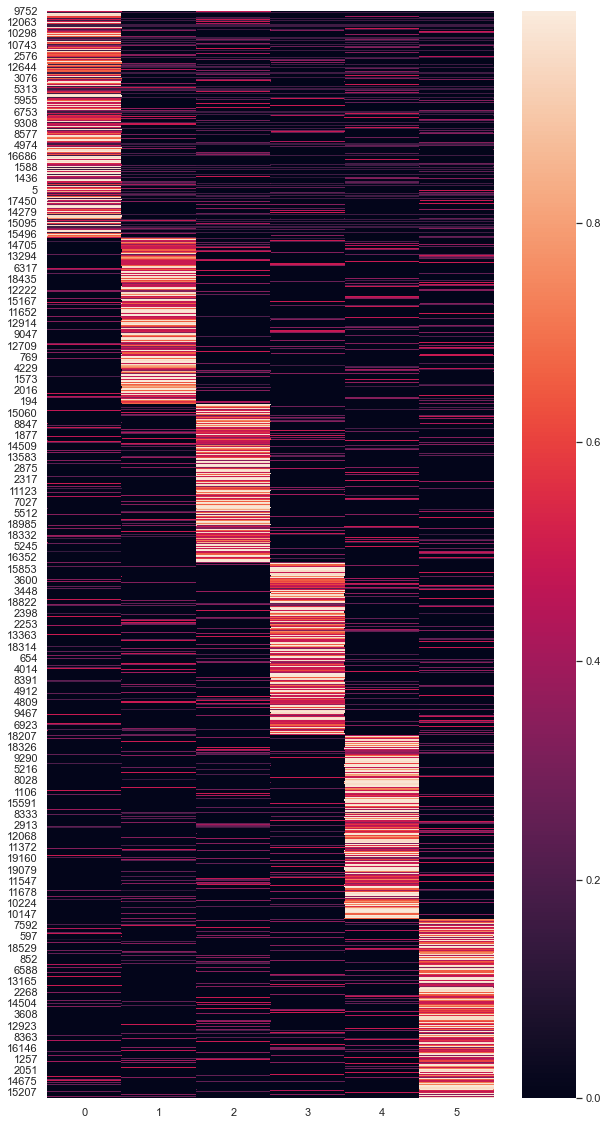

In [57]:
%matplotlib inline
import seaborn as sns; sns.set(rc={'figure.figsize':(10,20)})
sns.heatmap(document_topic.loc[document_topic.idxmax(axis=1).sort_values().index])

<AxesSubplot:>

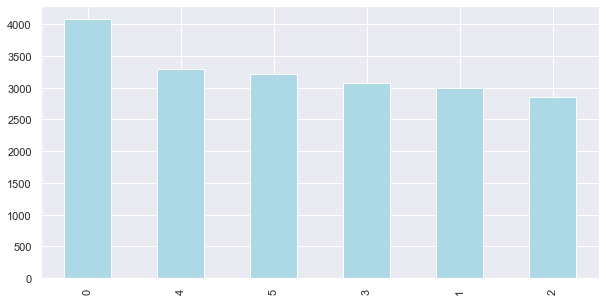

In [58]:
sns.set(rc={'figure.figsize':(10,5)})
document_topic.idxmax(axis=1).value_counts().plot.bar(color='lightblue')

In [59]:
from matplotlib.patches import Rectangle

<ipython-input-73-1779468a6072>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
<ipython-input-73-1779468a6072>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
<ipython-input-73-1779468a6072>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
<ipython-input-73-1779468a6072>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


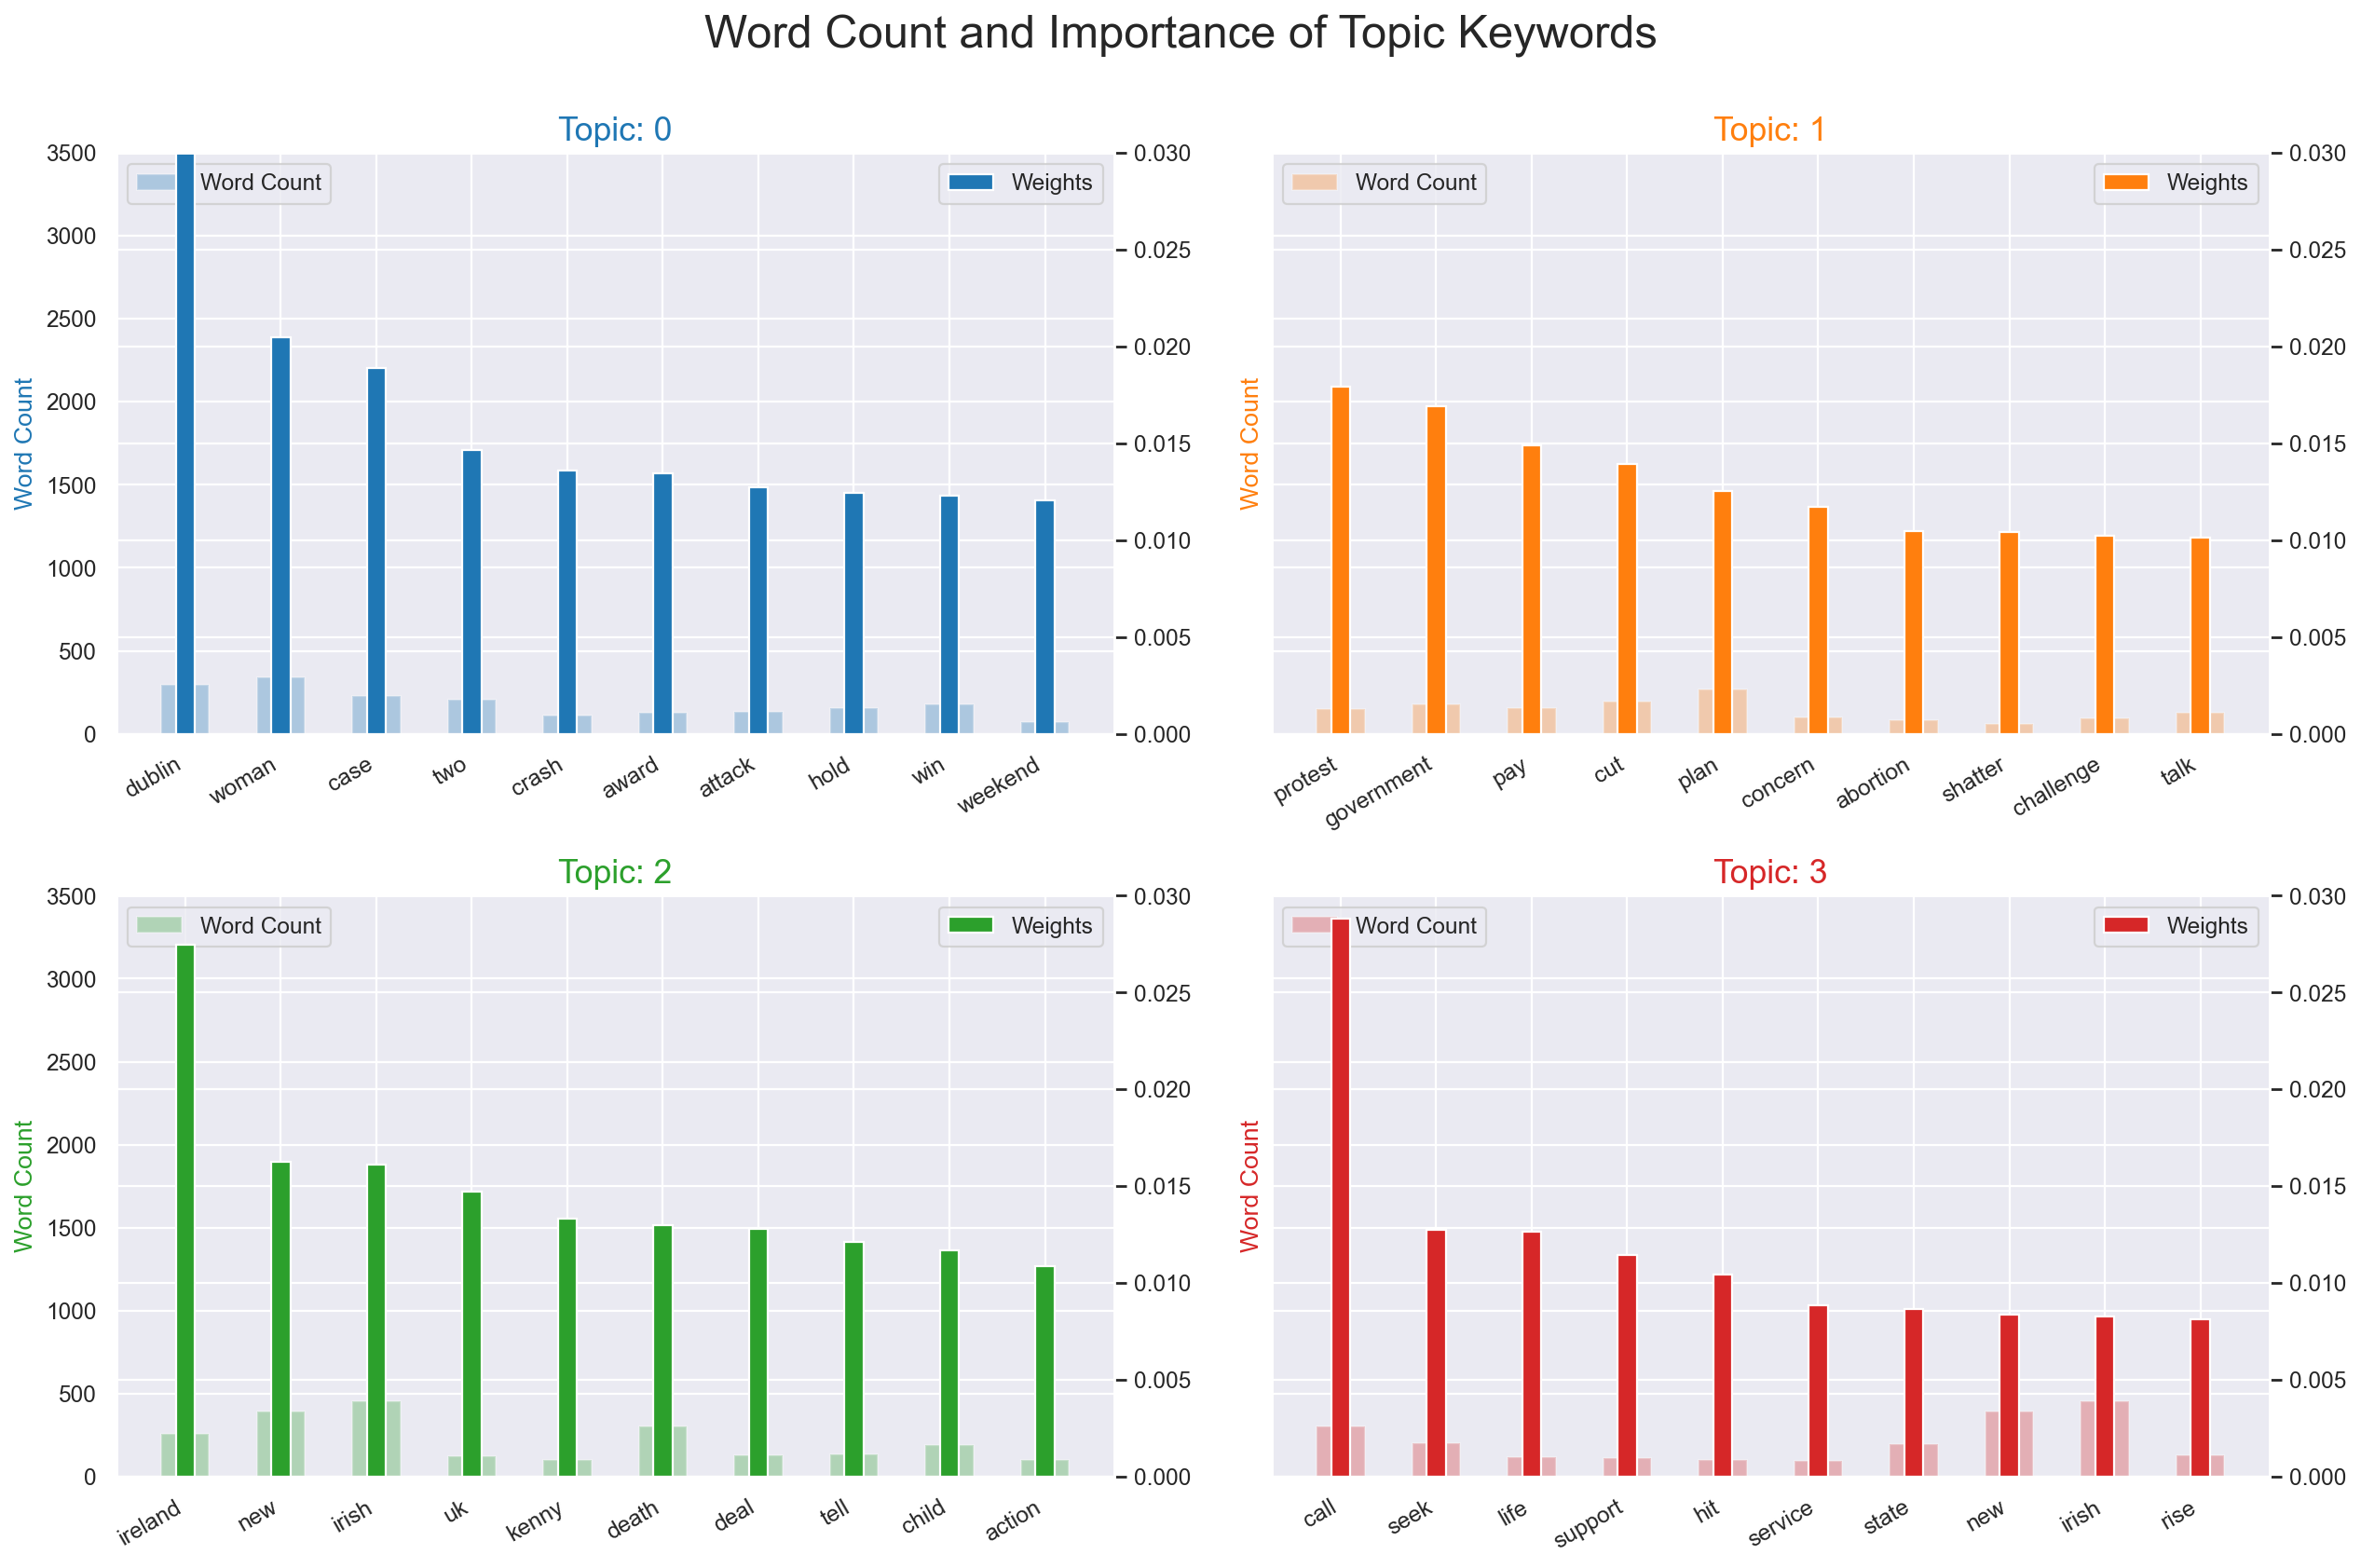

In [73]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in tokens for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()